This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to deep learning for computer vision

## Training a convnet from scratch on a small dataset

### The relevance of deep learning for small-data problems

### Downloading the data

**Reading in training, validation, test datasets**

* Step 1: Download the compressed dataset
cats_vs_dogs_small.zip from Canvas. Note: this is a slightly different dataset as the book as it contains 2000 pictures for training, 1000 for validation and 1000 (as opposed to 2000) for testing.

* Step 2: Unzip the file onto your local drive.

* Step 3: Upload your unzipped files (all folders and files) to your Google Drive

Instructions: log into your Google Drive using the same google account of your Google Colab. Find the "Colab Notebooks" folder. Drag the cats_vs_dogs_small folder into the "Colab Notebooks" folder. This should upload all subfolders and pictures onto your Google Drive.

* Step 4: mount your Google Drive within Colab using the following code

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




*   Step 5: find the path of your datafiles in Google Drive. On the left panel of Colab, Click File -> click folder content -> drive -> ...

For example, my path would look like something in the following: "/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_small"

Then you can set the path to your files with the following code:

In [ ]:
import os, shutil, pathlib

new_base_dir = pathlib.Path("drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")
print(new_base_dir)


drive/MyDrive/Colab Notebooks/cats_vs_dogs_small


Question 1: Consider the Cats & Dogs example. Start initially with a training sample of 1000, a validation sample of 500, and a test sample of 500. Use any technique to reduce overfitting and improve performance in developing a network that you train from scratch. What performance did you achieve?

In [ ]:
import os
import shutil
from pathlib import Path

original_data_dir = pathlib.Path("drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train1")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category
        dst_dir = new_base_dir / subset_name / category

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname


            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

make_subset("train", start_index=0, end_index=500)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train_1/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train_1/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train_1/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train_1/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train_1/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train_1/test/dogs


Using image_dataset_from_directory to read images

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 1000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


Displaying the shapes of the data and labels yielded by the Dataset

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


### Building the model

**Model 1**

**Instantiating a small convnet for dogs vs. cats classification**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

**Configuring the model for training**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Fitting the model using a `Dataset`**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
Model1 = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 126ms/step - accuracy: 0.4886 - loss: 0.7005 - val_accuracy: 0.5000 - val_loss: 0.6927
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5465 - loss: 0.7212 - val_accuracy: 0.5000 - val_loss: 0.6959
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4924 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 2.6693
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5716 - loss: 0.8152 - val_accuracy: 0.5060 - val_loss: 0.6882
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5719 - loss: 0.6857 - val_accuracy: 0.6100 - val_loss: 0.6516
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6105 - loss: 0.6924 - val_accuracy: 0.5720 - val_loss: 0.6736
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6105 - loss: 0.6534 - val_accuracy: 0.5480 - val_loss: 0.7180
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6520 - loss: 0.6254 - val_accuracy: 0.6540 - 

**Displaying curves of loss and accuracy during training**

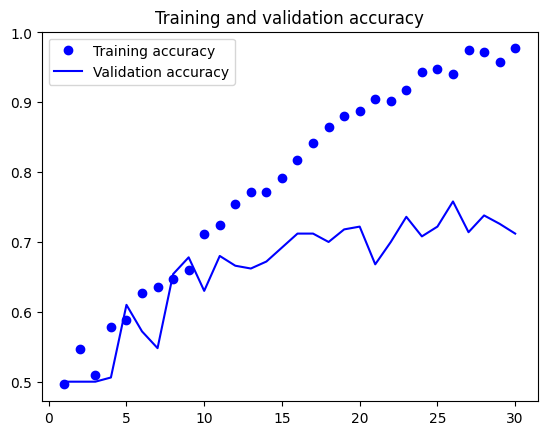

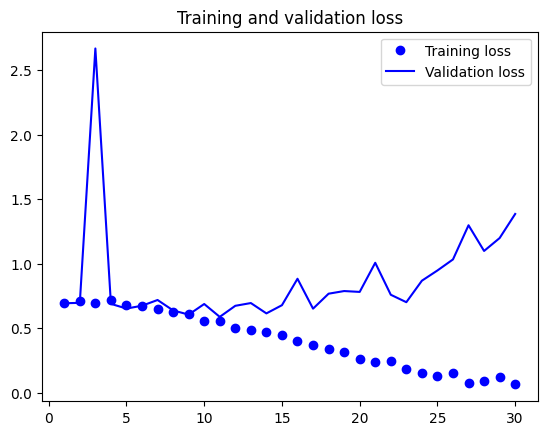

In [ ]:
import matplotlib.pyplot as plt
accuracy = Model1.history["accuracy"]
val_accuracy = Model1.history["val_accuracy"]
loss = Model1.history["loss"]
val_loss = Model1.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6719 - loss: 0.6039
Test accuracy: 0.674
Test loss: 0.602


### Using data augmentation

**Define a data augmentation stage to add to an image model**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

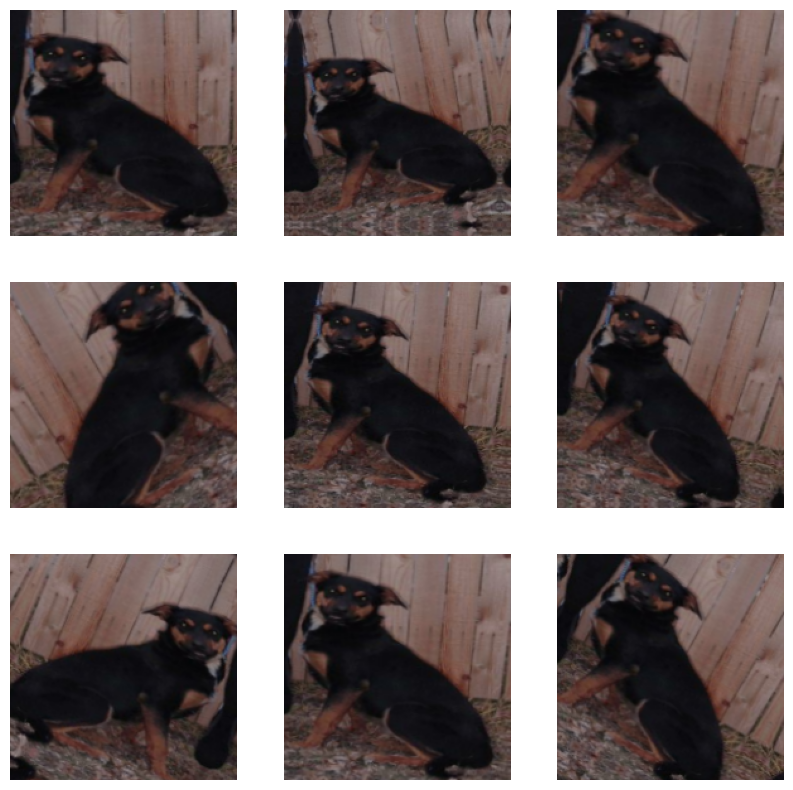

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Model 2**

**Defining a new convnet that includes image augmentation and dropout**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding="same")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding="same")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding="same")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding="same")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
Model2 = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.5098 - loss: 0.7302 - val_accuracy: 0.5020 - val_loss: 0.6922
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4983 - loss: 0.7051 - val_accuracy: 0.5000 - val_loss: 0.6927
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4998 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.7207
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5354 - loss: 0.6995 - val_accuracy: 0.5000 - val_loss: 0.8479
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5304 - loss: 0.7106 - val_accuracy: 0.5000 - val_loss: 2.3275
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6170 - loss: 0.8709 - val_accuracy: 0.5560 - val_loss: 0.6865
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6132 - loss: 0.6473 - val_accuracy: 0.5800 - val_loss: 0.6875
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6533 - loss: 0.6262 - val_accuracy: 0.6120 - v

Displaying curves of loss and accuracy during training

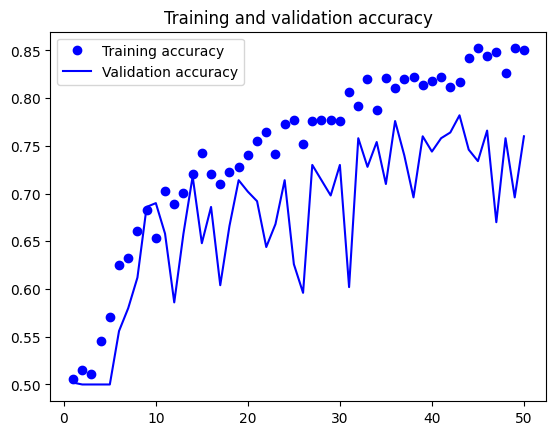

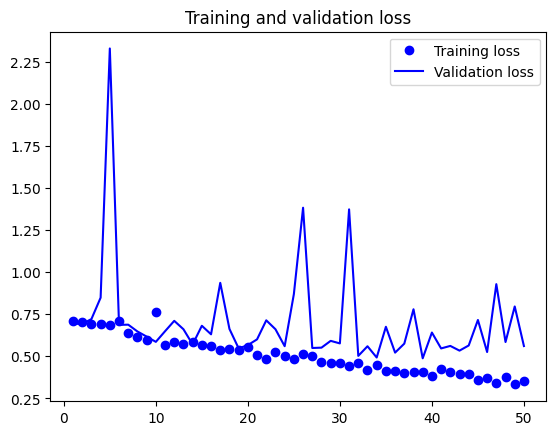

In [ ]:
import matplotlib.pyplot as plt
accuracy = Model2.history["accuracy"]
val_accuracy = Model2.history["val_accuracy"]

loss = Model2.history["loss"]
val_loss = Model2.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7159 - loss: 0.6086
Test accuracy: 0.742
Test loss: 0.579


Model 3

In [ ]:
inputs= keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs= layers.Dense(1, activation="sigmoid")(x)
model= keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])


In [ ]:
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 1, 1, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,159,169 (8.24 MB)

 Trainable params: 2,159,169 (8.24 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
Model3 = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.5079 - loss: 1.1414 - val_accuracy: 0.5000 - val_loss: 0.6927
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5140 - loss: 0.6946 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5028 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4792 - loss: 0.6944 - val_accuracy: 0.5000 - val_loss: 0.6979
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4878 - loss: 0.7008 - val_accuracy: 0.5000 - val_loss: 0.6929
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5326 - loss: 0.6919 - val_accuracy: 0.5000 - val_loss: 0.6927
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5508 - loss: 0.6927 - val_accuracy: 0.5060 - val_loss: 0.6923
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5263 - loss: 0.6900 - val_accuracy: 0.5340 - v

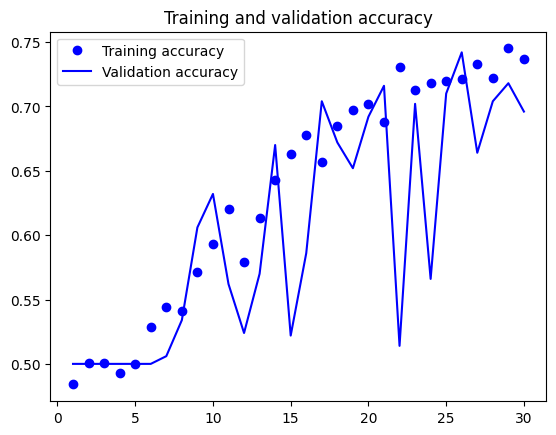

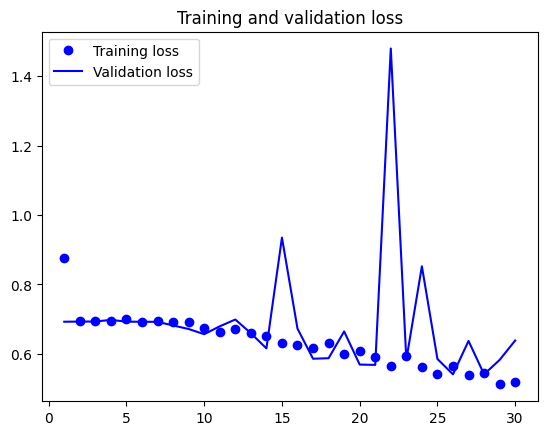

In [ ]:
import matplotlib.pyplot as plt
accuracy = Model3.history["accuracy"]
val_accuracy = Model3.history["val_accuracy"]

loss = Model3.history["loss"]
val_loss = Model3.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6887 - loss: 0.6122
Test accuracy: 0.692
Test loss: 0.611


Model 4

In [ ]:
inputs= keras.Input(shape=(180,180,3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=1024, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs= layers.Dense(1, activation="sigmoid")(x)
model= keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])


In [ ]:
model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_3 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 178, 178, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 89, 89, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 87, 87, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 43, 43, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 41, 41, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 20, 20, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 7, 7, 1024)          │       4,719,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │          50,177 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,320,769 (24.11 MB)

 Trainable params: 6,320,769 (24.11 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
Model4 = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.5097 - loss: 0.8530 - val_accuracy: 0.5000 - val_loss: 0.6924
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5252 - loss: 0.6941 - val_accuracy: 0.6300 - val_loss: 0.6923
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4955 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4999 - loss: 0.7193 - val_accuracy: 0.5000 - val_loss: 0.6928
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5267 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6965
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4917 - loss: 0.6960 - val_accuracy: 0.5000 - val_loss: 0.6939
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5431 - loss: 0.7095 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5281 - loss: 0.6947 - val_accuracy: 0.5760 - v

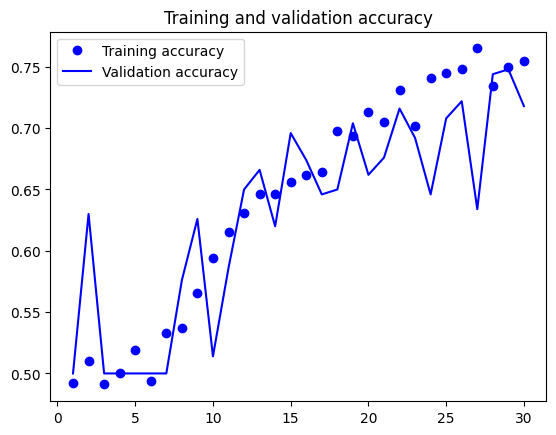

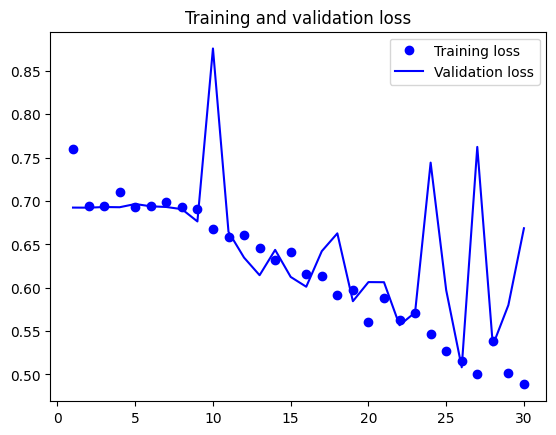

In [ ]:
import matplotlib.pyplot as plt
accuracy = Model4.history["accuracy"]
val_accuracy = Model4.history["val_accuracy"]

loss = Model4.history["loss"]
val_loss = Model4.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6895 - loss: 0.6043
Test accuracy: 0.704
Test loss: 0.592


In [ ]:
Model1 = (0.602, 0.674)
Model2 = (0.579, 0.742)
Model3 = (0.611, 0.692)
Model4 = (0.592, 0.704)

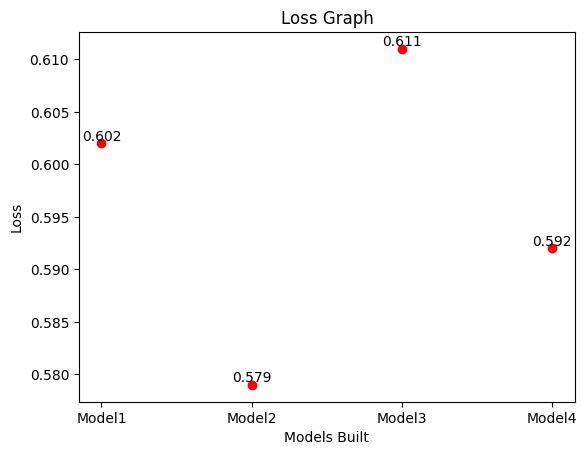

In [ ]:
Models= ("Model1","Model2","Model3","Model4")
Loss= (Model1[0],Model2[0],Model3[0],Model4[0])
Accuracy= (Model1[1],Model2[1],Model3[1],Model4[1])
plt.scatter(Models,Loss,color="red")
plt.title("Loss Graph")
plt.ylabel("Loss")
plt.xlabel("Models Built")

for (xi, yi) in zip(Models,Loss):
  plt.text(xi, yi, yi, va='bottom', ha='center')
plt.show()


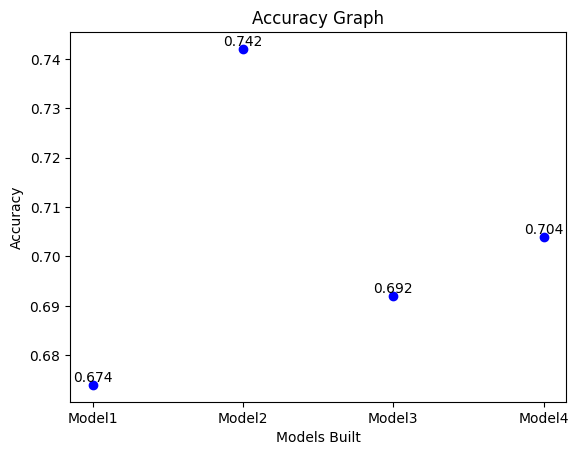

In [ ]:
plt.scatter(Models,Accuracy,color="blue")
plt.title("Accuracy Graph")
plt.ylabel("Accuracy")
plt.xlabel("Models Built")

for (xi, yi) in zip(Models,Accuracy):
  plt.text(xi, yi, yi, va='bottom', ha='center')
plt.show()


Question 2: Increase your training sample size. You may pick any amount. Keep the validation and test
samples the same as above. Optimize your network (again training from scratch). What
performance did you achieve?

In [ ]:
import os
import shutil
from pathlib import Path


original_data_dir = pathlib.Path("drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train2")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category
        dst_dir = new_base_dir / subset_name / category

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname


            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")


make_subset("train", start_index=0, end_index=700)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train2/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train2/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train2/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train2/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train2/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train2/test/dogs


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 1400 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_dataset:
 print("data batch shape:", data_batch.shape)
 print("labels batch shape:", labels_batch.shape)
 break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [ ]:
data_augmentation1 = keras.Sequential(
  [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.15),
    layers.RandomZoom(0.25)
  ]
)


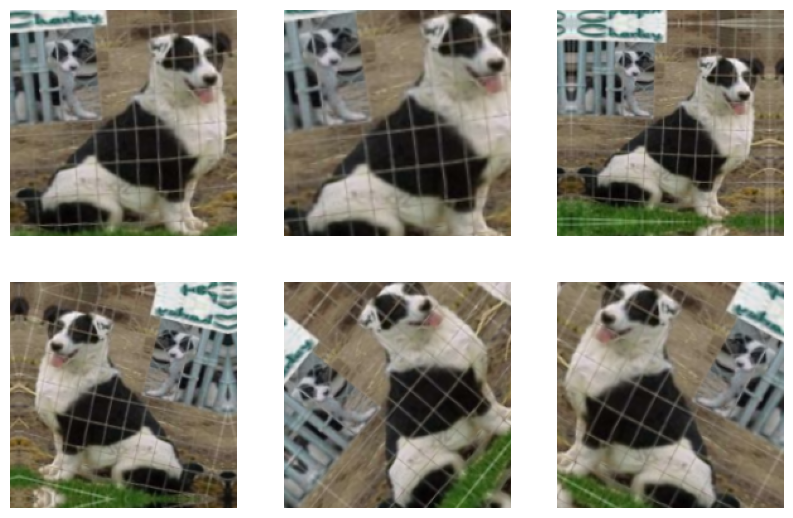

In [ ]:
plt.figure(figsize=(10, 10))
for images,_ in train_dataset.take(1):
  for i in range(6):
    augmented_images = data_augmentation1(images)
    ax= plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")


**Instantiating a small convnet for dogs vs. cats classification**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation1(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_4 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

**Configuring the model for training**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Fitting the model using a Dataset**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
Model5 = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.5133 - loss: 0.7142 - val_accuracy: 0.6160 - val_loss: 0.6902
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5412 - loss: 0.6932 - val_accuracy: 0.5020 - val_loss: 0.7407
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5239 - loss: 0.7107 - val_accuracy: 0.5640 - val_loss: 0.6732
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6062 - loss: 0.6718 - val_accuracy: 0.6400 - val_loss: 0.6441
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6003 - loss: 0.6672 - val_accuracy: 0.6260 - val_loss: 0.6569
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6225 - loss: 0.6628 - val_accuracy: 0.6860 - val_loss: 0.6050
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6005 - loss: 0.6406 - val_accuracy: 0.6480 - val_loss: 0.6115
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6436 - loss: 0.6258 - val_accuracy: 0.6360 - v

**Displaying curves of loss and accuracy during training**

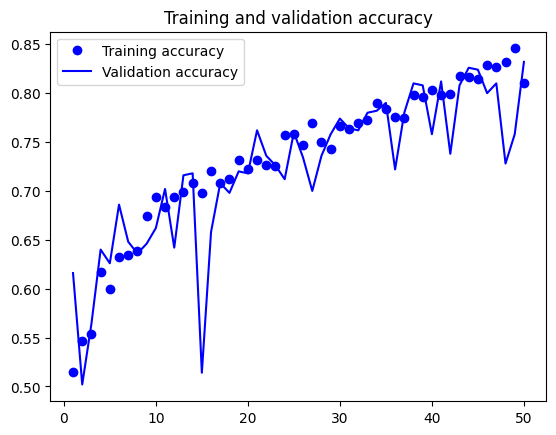

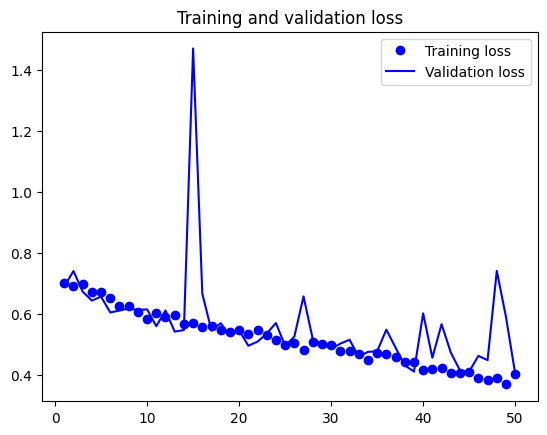

In [ ]:
import matplotlib.pyplot as plt
accuracy = Model5.history["accuracy"]
val_accuracy = Model5.history["val_accuracy"]
loss = Model5.history["loss"]
val_loss = Model5.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7834 - loss: 0.5456
Test accuracy: 0.796
Test loss: 0.514


Model 6

In [ ]:
inputs= keras.Input(shape=(180, 180, 3))
x = data_augmentation1(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(filters=64, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(filters=128, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(filters=256, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(filters=256, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs= layers.Dense(1, activation="sigmoid")(x)
model= keras.Model(inputs=inputs, outputs=outputs)


In [ ]:
model.summary()

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_5 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 90, 90, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 23, 23, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 6, 6, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │           9,217 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 987,713 (3.77 MB)

 Trainable params: 987,713 (3.77 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
Model6 = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.5435 - loss: 0.7068 - val_accuracy: 0.5000 - val_loss: 0.6928
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5209 - loss: 0.6937 - val_accuracy: 0.5100 - val_loss: 0.6910
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5019 - loss: 0.6947 - val_accuracy: 0.5500 - val_loss: 0.6916
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5321 - loss: 0.6943 - val_accuracy: 0.5080 - val_loss: 0.6889
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4995 - loss: 0.6944 - val_accuracy: 0.5360 - val_loss: 0.6844
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5525 - loss: 0.6839 - val_accuracy: 0.5820 - val_loss: 0.6600
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5790 - loss: 0.6592 - val_accuracy: 0.5820 - val_loss: 0.6600
Epoch 8/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6001 - loss: 0.6576 - val_accuracy: 0.5740 - v

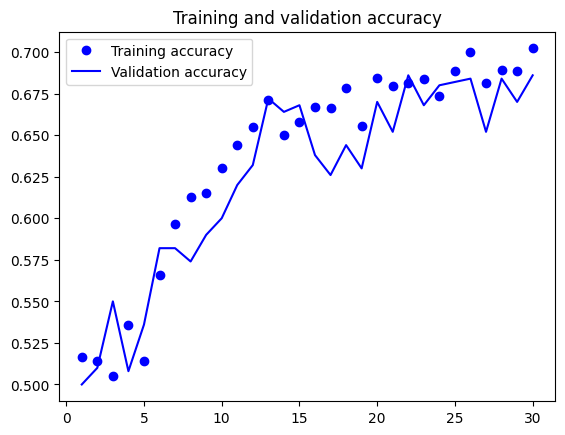

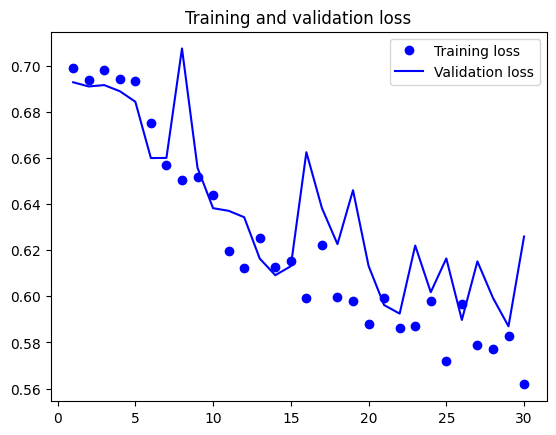

In [ ]:
import matplotlib.pyplot as plt
accuracy = Model6.history["accuracy"]
val_accuracy = Model6.history["val_accuracy"]
loss = Model6.history["loss"]
val_loss = Model6.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6096 - loss: 0.6549
Test accuracy: 0.618
Test loss: 0.650


In [ ]:
Model5 = (0.514, 0.796)
Model6 = (0.650, 0.618)

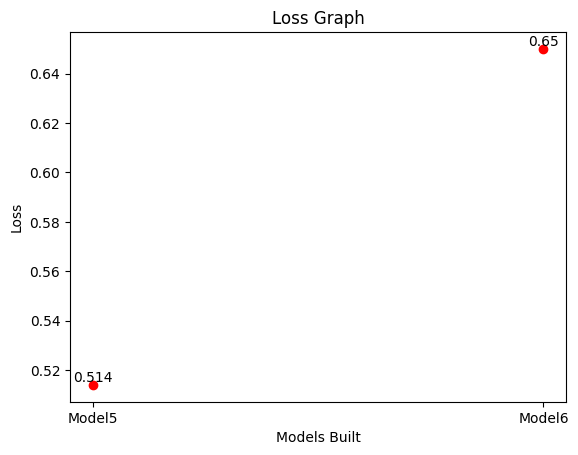

In [ ]:
Models= ("Model5","Model6")
Loss= (Model5[0], Model6[0])
Accuracy= (Model5[1], Model6[1])

plt.scatter(Models, Loss, color="red")
plt.title("Loss Graph")
plt.xlabel("Models Built")
plt.ylabel("Loss")

for (xi, yi) in zip(Models,Loss):
  plt.text(xi, yi, yi, va='bottom', ha='center')
plt.show()


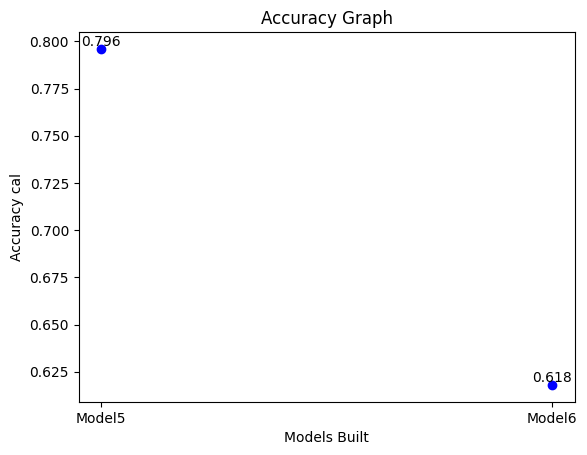

In [ ]:
plt.scatter(Models, Accuracy, color="blue")
plt.title("Accuracy Graph")
plt.xlabel("Models Built")
plt.ylabel("Accuracy cal")

for (xi, yi) in zip(Models,Accuracy):
  plt.text(xi, yi, yi, va='bottom', ha='center')
plt.show()


Question 3 : Now change your training sample so that you achieve better performance than those from Steps
1 and 2. This sample size may be larger, or smaller than those in the previous steps. The
objective is to find the ideal training sample size to get best prediction results.

Training has 1800 samples, test has 500 samples and validation has 500 samples.

In [ ]:
import os
import shutil
from pathlib import Path

original_data_dir = pathlib.Path("drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train3")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category
        dst_dir = new_base_dir / subset_name / category

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname


            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

make_subset("train", start_index=0, end_index=900)
make_subset("validation", start_index=1200, end_index=1450)
make_subset("test", start_index=1700, end_index=1950)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train3/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train3/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train3/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train3/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train3/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train3/test/dogs


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 1800 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [ ]:
data_augmentation2 = keras.Sequential(
  [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.15),
    layers.RandomZoom(0.25)
  ]
)

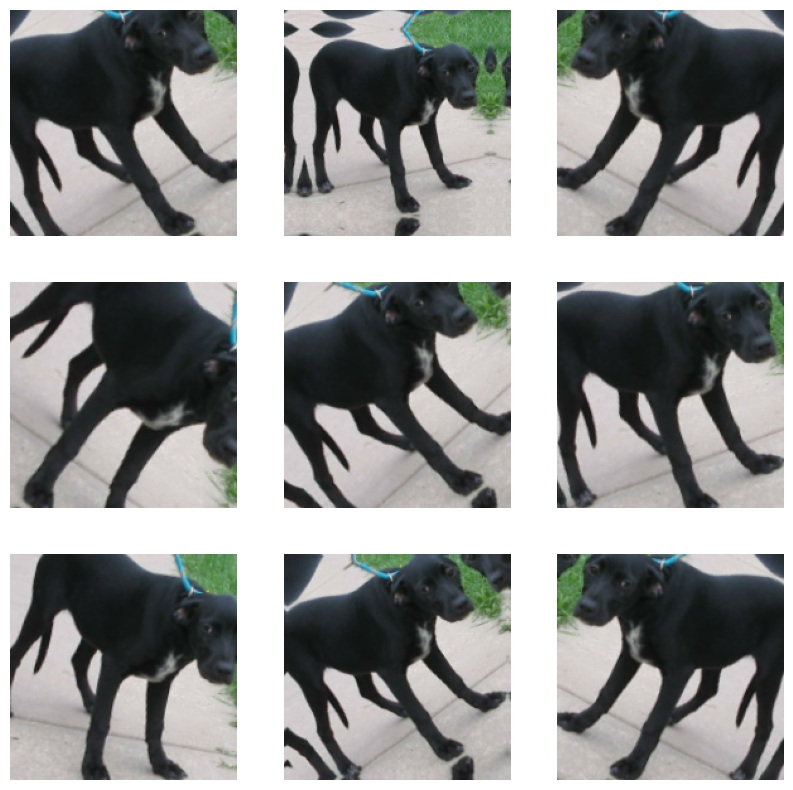

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation2(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Model 7**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_6 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

**Configuring the model for training**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Fitting the model using a Dataset**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
Model7 = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.5297 - loss: 0.6962 - val_accuracy: 0.5000 - val_loss: 0.7021
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5291 - loss: 0.6920 - val_accuracy: 0.6420 - val_loss: 0.6591
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6354 - loss: 0.6498 - val_accuracy: 0.6140 - val_loss: 0.6706
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6461 - loss: 0.6415 - val_accuracy: 0.6560 - val_loss: 0.6024
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6781 - loss: 0.6017 - val_accuracy: 0.6900 - val_loss: 0.5920
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7268 - loss: 0.5460 - val_accuracy: 0.6920 - val_loss: 0.5968
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7242 - loss: 0.5372 - val_accuracy: 0.7460 - val_loss: 0.5679
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7517 - loss: 0.5093 - val_accuracy: 0.6920 - v

**Displaying curves of loss and accuracy during training**

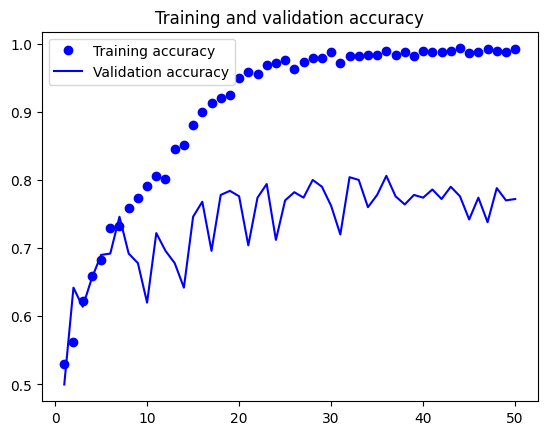

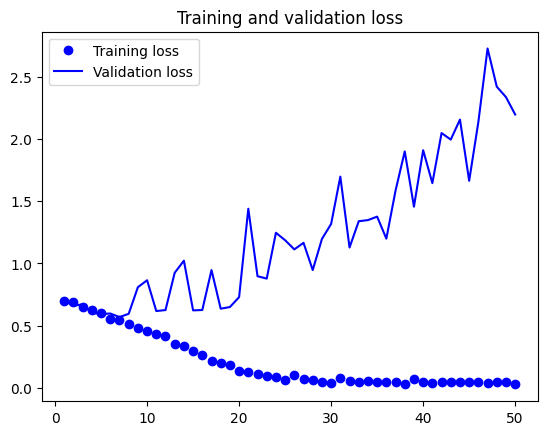

In [ ]:
import matplotlib.pyplot as plt
accuracy = Model7.history["accuracy"]
val_accuracy = Model7.history["val_accuracy"]
loss = Model7.history["loss"]
val_loss = Model7.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**



In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7359 - loss: 0.5843
Test accuracy: 0.744
Test loss: 0.573


**Model 8**

In [ ]:
inputs= keras.Input(shape=(180, 180, 3))
x = data_augmentation2(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2,strides=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)

outputs= layers.Dense(1, activation="sigmoid")(x)
model= keras.Model(inputs=inputs, outputs=outputs)


model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
Model8 = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5197 - loss: 0.7029 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4993 - loss: 0.6957 - val_accuracy: 0.5120 - val_loss: 0.6924
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5352 - loss: 0.6937 - val_accuracy: 0.5300 - val_loss: 0.6925
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5166 - loss: 0.6962 - val_accuracy: 0.5060 - val_loss: 0.6941
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5578 - loss: 0.6838 - val_accuracy: 0.5000 - val_loss: 0.7011
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5761 - loss: 0.6757 - val_accuracy: 0.5600 - val_loss: 0.7146
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6085 - loss: 0.6628 - val_accuracy: 0.6100 - val_loss: 0.6470
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6275 - loss: 0.6481 - val_accuracy: 0.6160 - v

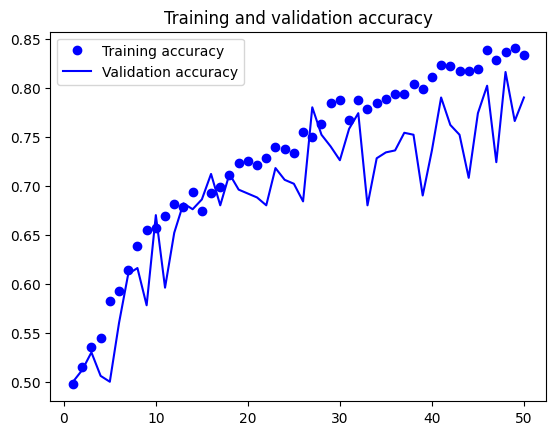

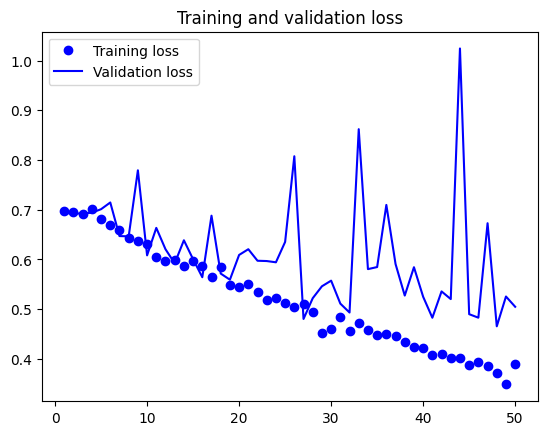

In [ ]:
import matplotlib.pyplot as plt
accuracy = Model8.history["accuracy"]
val_accuracy = Model8.history["val_accuracy"]
loss = Model8.history["loss"]
val_loss = Model8.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8190 - loss: 0.5048
Test accuracy: 0.814
Test loss: 0.481


**Model 9**

In [ ]:
inputs= keras.Input(shape=(180, 180, 3))
x = data_augmentation2(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2, padding="same")(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2, padding="same")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2, padding="same")(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2,strides=2, padding="same")(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs= layers.Dense(1, activation="sigmoid")(x)
model= keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
model.summary()

Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_8 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 44, 44, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 42, 42, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 21, 21, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (None, 19, 19, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_45 (Conv2D)                   │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │          32,769 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,601,345 (6.11 MB)

 Trainable params: 1,601,345 (6.11 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
Model9 = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.5193 - loss: 0.7924 - val_accuracy: 0.5140 - val_loss: 0.6926
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5037 - loss: 0.6935 - val_accuracy: 0.5140 - val_loss: 0.6928
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5211 - loss: 0.6911 - val_accuracy: 0.5420 - val_loss: 0.6818
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5606 - loss: 0.6782 - val_accuracy: 0.5280 - val_loss: 0.6925
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6150 - loss: 0.6540 - val_accuracy: 0.5560 - val_loss: 0.6809
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6211 - loss: 0.6424 - val_accuracy: 0.6580 - val_loss: 0.6005
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6246 - loss: 0.6452 - val_accuracy: 0.5820 - val_loss: 0.6865
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6471 - loss: 0.6287 - val_accuracy: 0.6680 - v

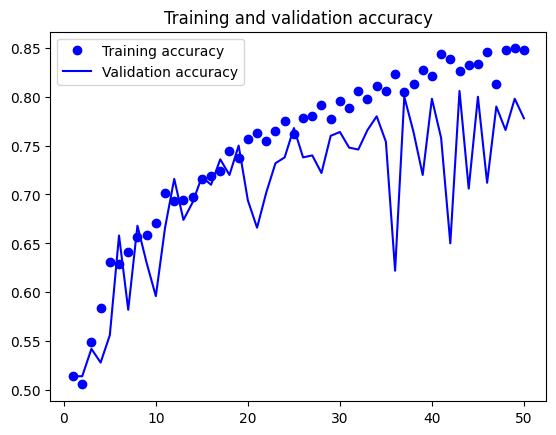

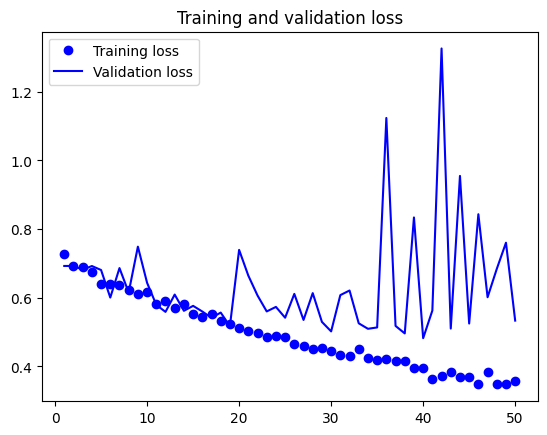

In [ ]:
import matplotlib.pyplot as plt
accuracy = Model9.history["accuracy"]
val_accuracy = Model9.history["val_accuracy"]
loss = Model9.history["loss"]
val_loss = Model9.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8561 - loss: 0.4528
Test accuracy: 0.836
Test loss: 0.442


In [ ]:
Model7 = (0.573, 0.744)
Model8 = (0.481, 0.814)
Model9 = (0.442, 0.836)

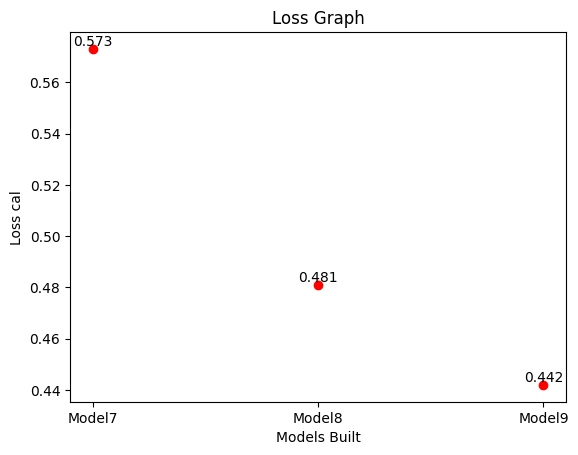

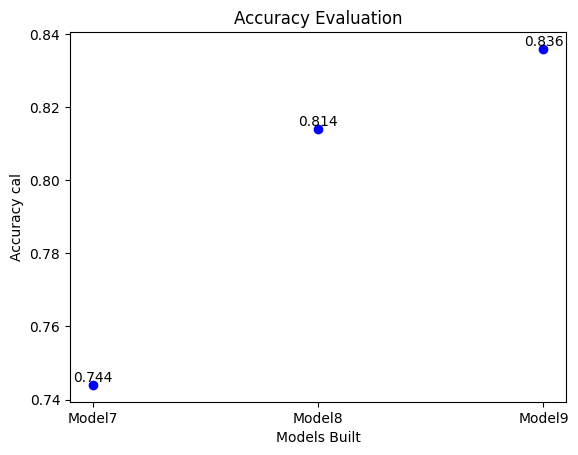

In [ ]:
Models= ("Model7","Model8","Model9")
Loss= (Model7[0], Model8[0],Model9[0])
Accuracy= (Model7[1], Model8[1],Model9[1])

plt.scatter(Models, Loss, color="red")
plt.title("Loss Graph")
plt.xlabel("Models Built")
plt.ylabel("Loss cal")

for (xi, yi) in zip(Models,Loss):
  plt.text(xi, yi, yi, va='bottom', ha='center')
plt.show()

plt.scatter(Models, Accuracy, color="blue")
plt.title("Accuracy Evaluation")
plt.xlabel("Models Built")
plt.ylabel("Accuracy cal")

for (xi, yi) in zip(Models,Accuracy):
  plt.text(xi, yi, yi, va='bottom', ha='center')
plt.show()


Building Model 10 with Train Size with 1900

In [ ]:
import os
import shutil
from pathlib import Path

original_data_dir = pathlib.Path("drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train4")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category
        dst_dir = new_base_dir / subset_name / category

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname

            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

make_subset("train", start_index=0, end_index=950)
make_subset("validation", start_index=1250, end_index=1500)
make_subset("test", start_index=1500, end_index=1750)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train4/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train4/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train4/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train4/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train4/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train4/test/dogs


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train", #change to train1, ...for train5 for diferent models
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 1900 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break


data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [ ]:
data_augmentation3 = keras.Sequential(
  [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.15),
    layers.RandomZoom(0.25)
  ]
)



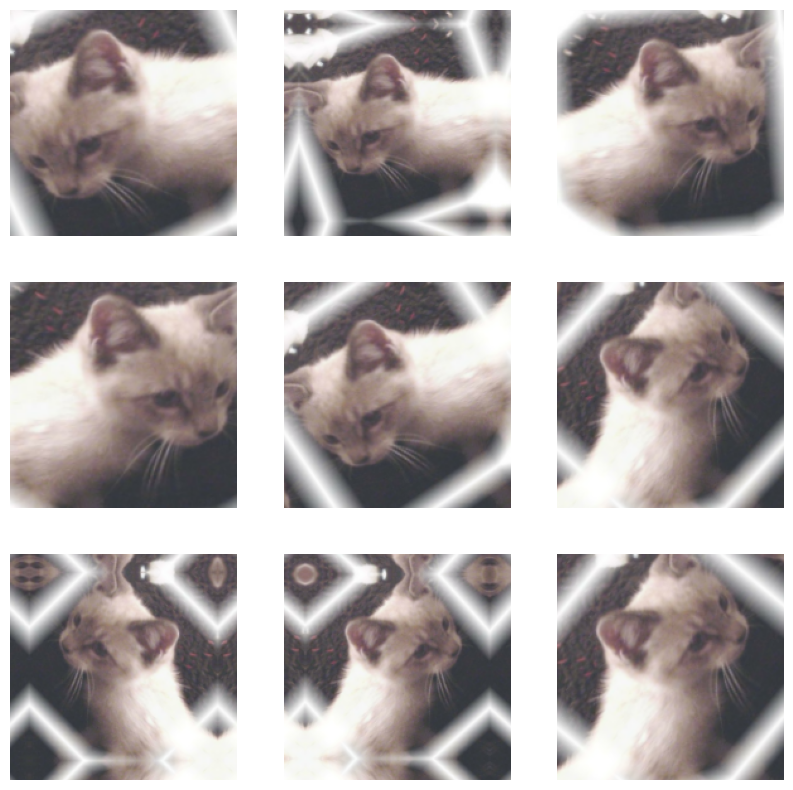

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation3(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation3(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "functional_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_9 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_46 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_47 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_48 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_49 (Conv2D)                   │ (None, 18, 18, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_50 (Conv2D)                   │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_51 (Conv2D)                   │ (None, 1, 1, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,716,673 (6.55 MB)

 Trainable params: 1,716,673 (6.55 MB)

 Non-trainable params: 0 (0.00 B)

**Configuring the model for training**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Fitting the model using a Dataset**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
Model10 = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 0.4889 - loss: 0.6962 - val_accuracy: 0.5000 - val_loss: 0.9402
Epoch 2/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5347 - loss: 0.7074 - val_accuracy: 0.5560 - val_loss: 0.6862
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5670 - loss: 0.6920 - val_accuracy: 0.6460 - val_loss: 0.6687
Epoch 4/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6152 - loss: 0.6683 - val_accuracy: 0.5240 - val_loss: 0.6897
Epoch 5/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6351 - loss: 0.6398 - val_accuracy: 0.5180 - val_loss: 0.8339
Epoch 6/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6674 - loss: 0.6302 - val_accuracy: 0.6940 - val_loss: 0.6036
Epoch 7/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6463 - loss: 0.6179 - val_accuracy: 0.6040 - val_loss: 0.7257
Epoch 8/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6992 - loss: 0.5765 - val_accuracy: 0.6420 - v

**Displaying curves of loss and accuracy during training**

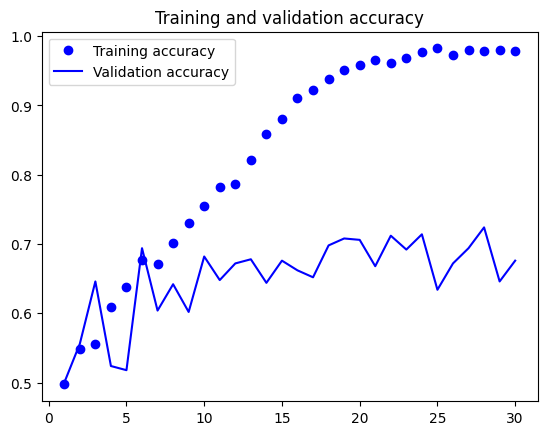

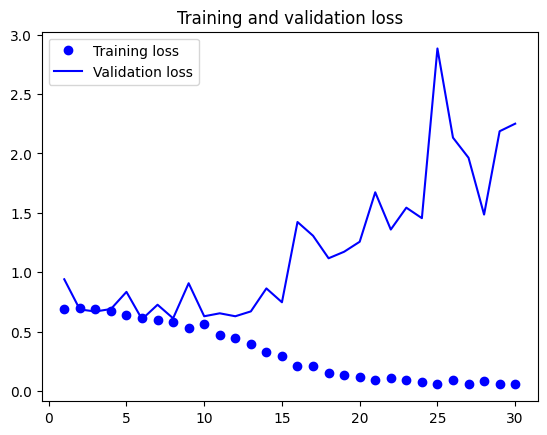

In [ ]:
import matplotlib.pyplot as plt
accuracy = Model10.history["accuracy"]
val_accuracy = Model10.history["val_accuracy"]
loss = Model10.history["loss"]
val_loss = Model10.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6739 - loss: 0.6099
Test accuracy: 0.666
Test loss: 0.627


In [ ]:
Model7 = (0.568, 0.720)
Model8 = (0.519, 0.776)
Model9 = (0.467, 0.784)
Model10 = (0.627, 0.666)

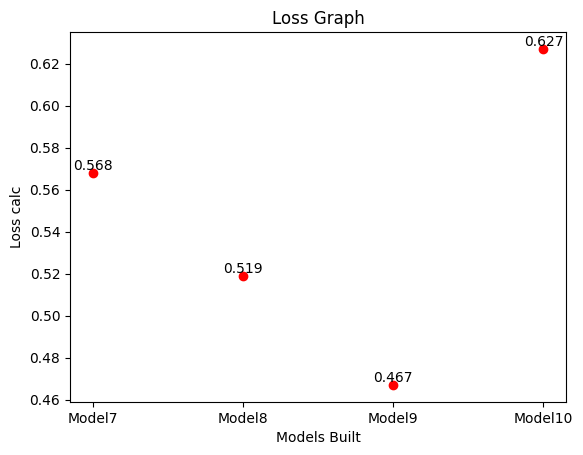

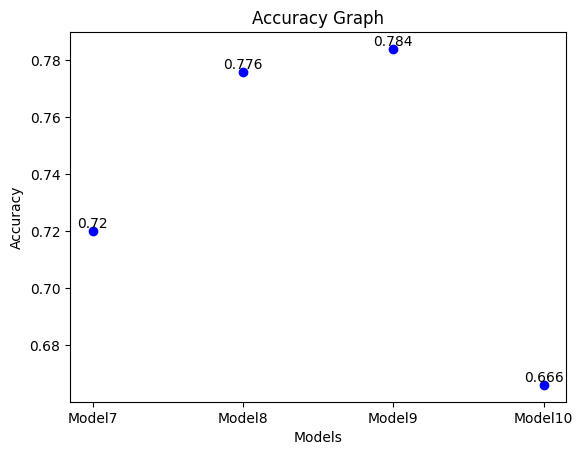

In [ ]:
Models= ("Model7","Model8","Model9","Model10")
Loss= (Model7[0], Model8[0],Model9[0],Model10[0])
Accuracy= (Model7[1], Model8[1],Model9[1],Model10[1])

plt.scatter(Models, Loss, color="red")
plt.title("Loss Graph")
plt.xlabel("Models Built")
plt.ylabel("Loss calc")

for (xi, yi) in zip(Models,Loss):
 plt.text(xi, yi, yi, va='bottom', ha='center')
plt.show()

plt.scatter(Models, Accuracy, color="blue")
plt.title("Accuracy Graph")
plt.xlabel("Models")
plt.ylabel("Accuracy")

for (xi, yi) in zip(Models,Accuracy):
 plt.text(xi, yi, yi, va='bottom', ha='center')
plt.show()


Comparing the model

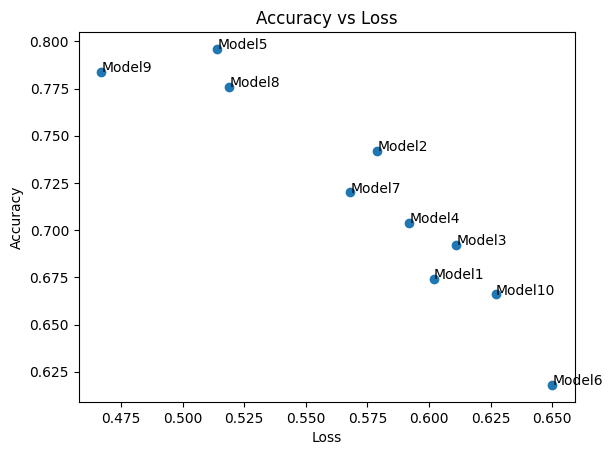

In [ ]:
import matplotlib.pyplot as plt

Model1 = (0.602, 0.674)
Model2 = (0.579, 0.742)
Model3 = (0.611, 0.692)
Model4 = (0.592, 0.704)
Model5 = (0.514, 0.796)
Model6 = (0.650, 0.618)
Model7 = (0.568, 0.720)
Model8 = (0.519, 0.776)
Model9 = (0.467, 0.784)
Model10 = (0.627, 0.666)

Models = ["Model1", "Model2", "Model3", "Model4", "Model5", "Model6", "Model7", "Model8", "Model9", "Model10"]
Loss_cal = [Model1[0], Model2[0], Model3[0], Model4[0], Model5[0], Model6[0], Model7[0], Model8[0], Model9[0], Model10[0]]
Accuracy_cal = [Model1[1], Model2[1], Model3[1], Model4[1], Model5[1], Model6[1], Model7[1], Model8[1], Model9[1], Model10[1]]

fig, ax = plt.subplots()
ax.scatter(Loss_cal, Accuracy_cal)

for i, txt in enumerate(Models):
    ax.annotate(txt, (Loss_cal[i], Accuracy_cal[i]))

plt.title("Accuracy vs Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")


plt.show()

Question 4: Repeat Steps 1-3, but now using a pretrained network. The sample sizes you use in Steps 2 and 3
for the pretrained network may be the same or different from those using the network where
you trained from scratch. Again, use any and all optimization techniques to get best
performance

In [ ]:
import os
import shutil
from pathlib import Path

#Building model with train size 1400 and same values of validation, test
original_data_dir = pathlib.Path("drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train2")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category
        dst_dir = new_base_dir / subset_name / category

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname

            # Copy only if the source file exists
            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")


make_subset("train", start_index=0, end_index=700)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train2/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train2/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train2/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train2/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train2/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train2/test/dogs


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 1400 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, models

conv_base = keras.applications.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

conv_base.trainable = False

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])




58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.9444 - loss: 0.2266 - val_accuracy: 0.7600 - val_loss: 1.3128
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9928 - loss: 0.0362 - val_accuracy: 0.7140 - val_loss: 1.4544
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9935 - loss: 0.0268 - val_accuracy: 0.7660 - val_loss: 1.5008
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9926 - loss: 0.0415 - val_accuracy: 0.7220 - val_loss: 1.7632
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9814 - loss: 0.0653 - val_accuracy: 0.7520 - val_loss: 1.4131
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9906 - loss: 0.0357 - val_accuracy: 0.6920 - val_loss: 2.6058
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9626 - loss: 0.1954 - val_accuracy: 0.7360 - val_loss: 2.1746
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9783 - loss: 0.0807 - val_accuracy: 0.7260 - v

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6654 - loss: 0.6151
Test accuracy: 0.666
Test loss: 0.627


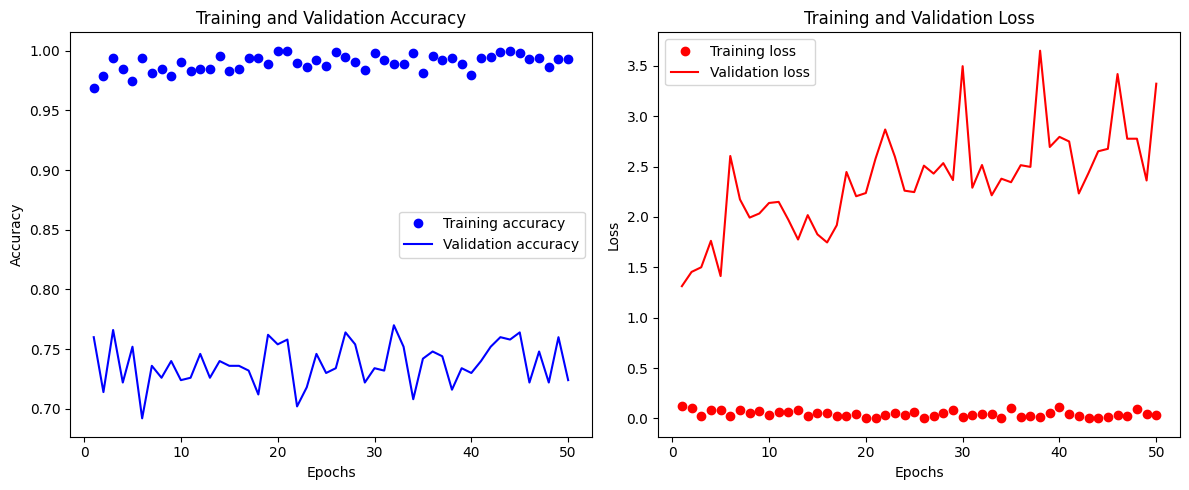

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**VGG model 1900 training size**

In [ ]:
import os
import shutil
from pathlib import Path

original_data_dir = pathlib.Path("drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train4")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category
        dst_dir = new_base_dir / subset_name / category

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname

            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

make_subset("train", start_index=0, end_index=950)
make_subset("validation", start_index=1250, end_index=1500)
make_subset("test", start_index=1500, end_index=1750)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train4/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train4/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train4/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train4/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train4/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train4/test/dogs


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 1900 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

conv_base.trainable = False

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.9646 - loss: 0.2074 - val_accuracy: 0.6760 - val_loss: 2.1383
Epoch 2/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9812 - loss: 0.0440 - val_accuracy: 0.6840 - val_loss: 3.4574
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9787 - loss: 0.0646 - val_accuracy: 0.7040 - val_loss: 3.0891
Epoch 4/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9939 - loss: 0.0284 - val_accuracy: 0.6780 - val_loss: 2.9965
Epoch 5/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9925 - loss: 0.0256 - val_accuracy: 0.7060 - val_loss: 3.2551
Epoch 6/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9857 - loss: 0.0554 - val_accuracy: 0.7080 - val_loss: 3.4584
Epoch 7/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9945 - loss: 0.0274 - val_accuracy: 0.7120 - val_loss: 3.4186
Epoch 8/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9892 - loss: 0.0306 - val_accuracy: 0.6520 - v

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8060 - loss: 0.4468
Test accuracy: 0.790
Test loss: 0.471


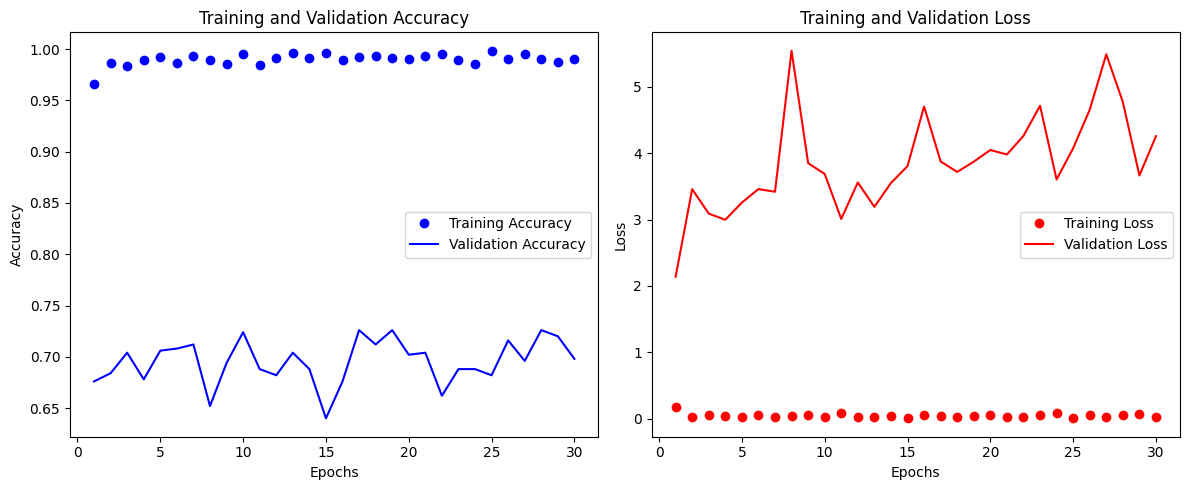

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

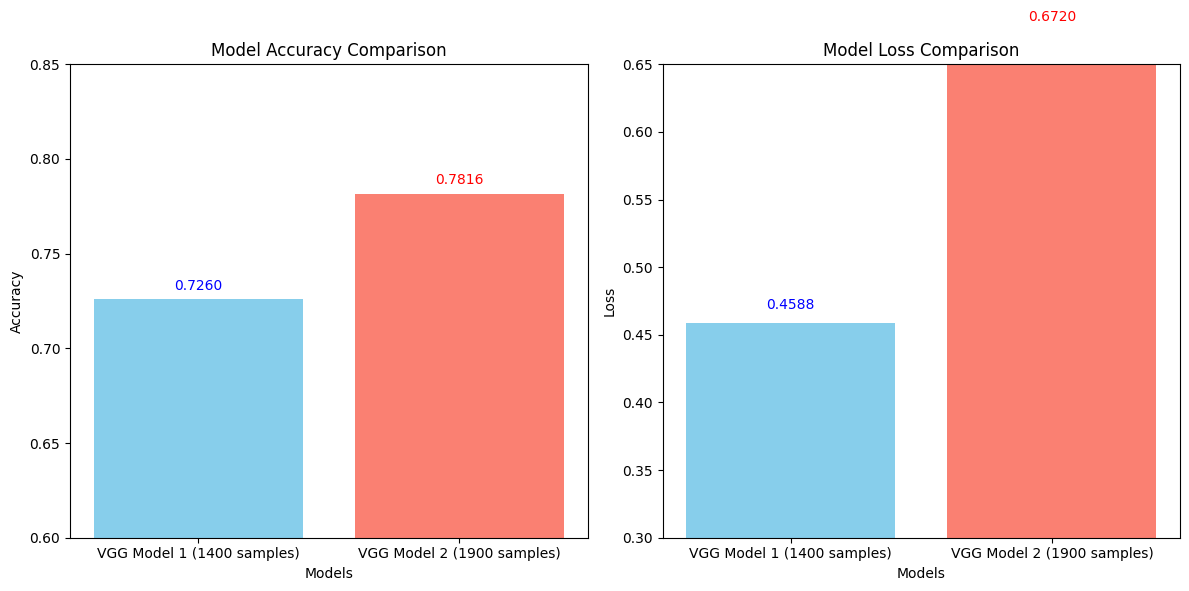

In [ ]:
import matplotlib.pyplot as plt

models = ['VGG Model 1 (1400 samples)', 'VGG Model 2 (1900 samples)']

accuracy = [0.726, 0.7816]
loss = [0.4588, 0.672]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.bar(models, accuracy, color=['skyblue', 'salmon'])
ax1.set_title('Model Accuracy Comparison')
ax1.set_ylim(0.6, 0.85)
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Models')
ax1.text(0, accuracy[0] + 0.005, f"{accuracy[0]:.4f}", ha='center', color='blue')
ax1.text(1, accuracy[1] + 0.005, f"{accuracy[1]:.4f}", ha='center', color='red')

ax2.bar(models, loss, color=['skyblue', 'salmon'])
ax2.set_title('Model Loss Comparison')
ax2.set_ylim(0.3, 0.65)
ax2.set_ylabel('Loss')
ax2.set_xlabel('Models')
ax2.text(0, loss[0] + 0.01, f"{loss[0]:.4f}", ha='center', color='blue')
ax2.text(1, loss[1] + 0.01, f"{loss[1]:.4f}", ha='center', color='red')

plt.tight_layout()
plt.show()